In [ ]:
#!pip install textstat 
# https://github.com/textstat/textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 4.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 9.8 MB/s eta 0:00:00a 0:00:01


In [1]:
import pandas as pd
import textstat

# Load the CSV file
file_path = "../data/cleaned_notes.csv"
notes_df = pd.read_csv(file_path)
notes_df.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version,diagnosis_category,gender,anchor_age,anchor_year,anchor_year_group,...,note_id,note_type,note_seq,charttime,storetime,text,note_length,anchor_date,days_since_anchor,cleaned_note_text
0,10070024,26769931,1,F323,10,Major Depression,F,23,2142,2014 - 2016,...,10070024-DS-13,DS,13.0,2145-01-29,2145-01-29 09:59:00,\nName: ___ Unit No: ___...,20409,2142-01-01,1124,\nName: ___ Unit No: ___...
1,10070024,26398294,1,F3189,10,Bipolar Disorder,F,23,2142,2014 - 2016,...,10070024-DS-14,DS,14.0,2145-02-09,2145-02-09 11:46:00,\nName: ___ Unit No: ___...,17868,2142-01-01,1135,"Chief Complaint:\n""I made a mistake. ""\n \nMaj..."
2,10080985,24679803,1,F332,10,Major Depression,F,22,2179,2014 - 2016,...,10080985-DS-16,DS,16.0,2179-05-13,2179-05-13 15:28:00,\nName: ___ Unit No: ___...,14035,2179-01-01,132,\nName: ___ Unit No: ___...
3,10080985,26523165,1,F329,10,Major Depression,F,22,2179,2014 - 2016,...,10080985-DS-15,DS,15.0,2179-05-11,2180-08-14 18:55:00,\nName: ___ Unit No: ___...,7168,2179-01-01,130,Chief Complaint:\ngenetic predisposition to br...
4,10266157,29245849,1,F332,10,Major Depression,F,76,2194,2011 - 2013,...,10266157-DS-22,DS,22.0,2198-10-22,2198-10-26 07:11:00,\nName: ___ Unit No: ___\...,11648,2194-01-01,1755,\nName: ___ Unit No: ___\...


In [2]:
# Calculate SMOG, KFGL, and GFI for each note in the 'text' column
notes_df["SMOG"] = notes_df["text"].apply(textstat.smog_index)
notes_df["KFGL"] = notes_df["text"].apply(textstat.flesch_kincaid_grade)
notes_df["GFI"] = notes_df["text"].apply(textstat.gunning_fog)

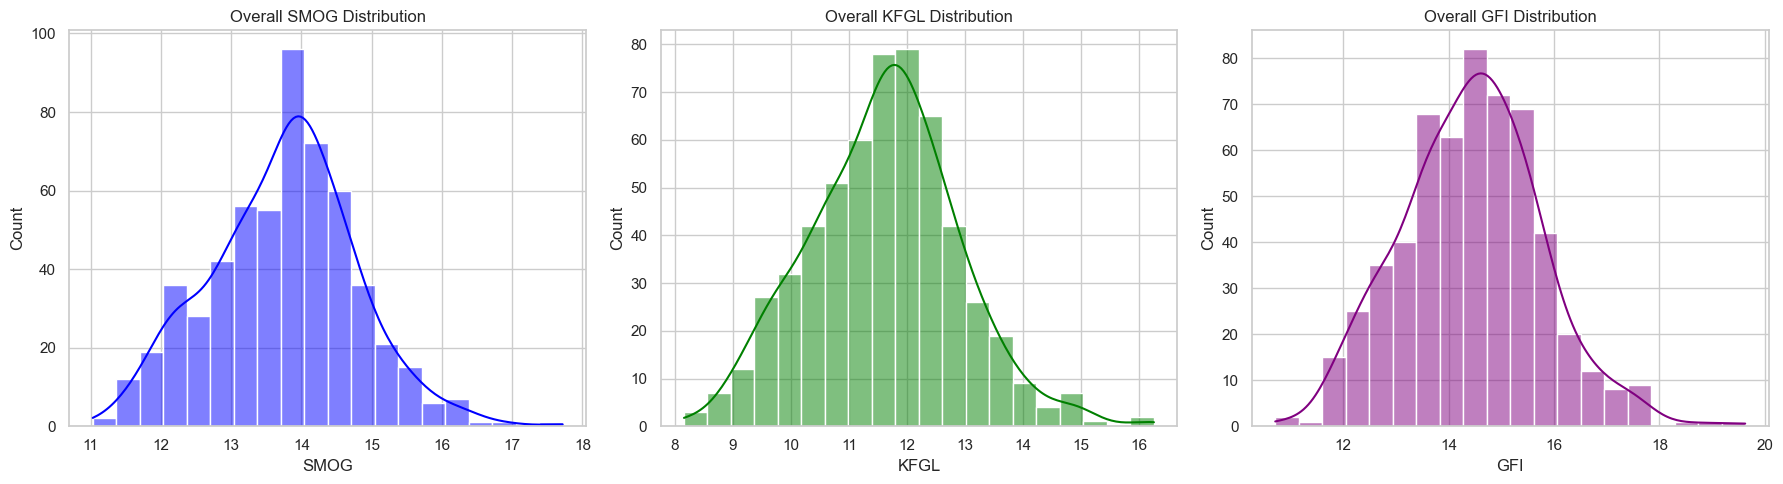

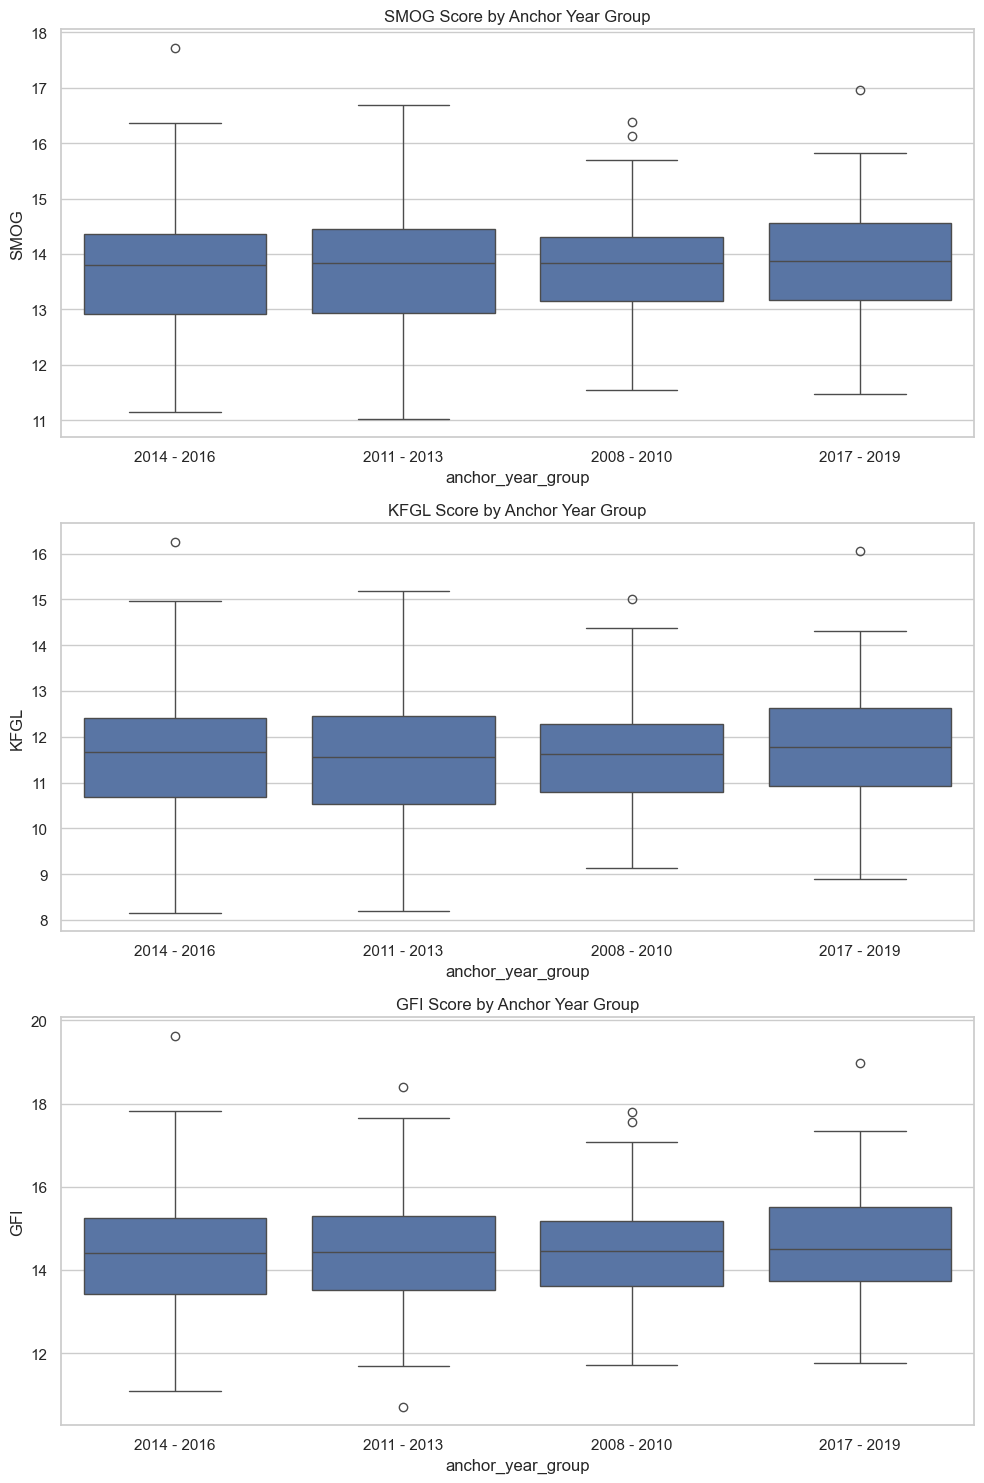

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Overall distribution of readability scores
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(notes_df["SMOG"], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Overall SMOG Distribution")
sns.histplot(notes_df["KFGL"], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title("Overall KFGL Distribution")
sns.histplot(notes_df["GFI"], bins=20, kde=True, ax=axes[2], color='purple')
axes[2].set_title("Overall GFI Distribution")
plt.tight_layout()
plt.show()

# Distribution of readability scores by anchor_year_group
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.boxplot(data=notes_df, x="anchor_year_group", y="SMOG", ax=axes[0])
axes[0].set_title("SMOG Score by Anchor Year Group")

sns.boxplot(data=notes_df, x="anchor_year_group", y="KFGL", ax=axes[1])
axes[1].set_title("KFGL Score by Anchor Year Group")

sns.boxplot(data=notes_df, x="anchor_year_group", y="GFI", ax=axes[2])
axes[2].set_title("GFI Score by Anchor Year Group")

plt.tight_layout()
plt.show()


In [33]:
# Calculate basic statistics
readability_stats = notes_df[["SMOG", "KFGL", "GFI"]].describe().transpose()

# Add interpretation of grade levels
readability_stats["Typical Education Level"] = readability_stats["mean"].apply(
    lambda x: 
    "Elementary School (Grade 1-5)" if x < 6 else
    "Middle School (Grade 6-8)" if x < 9 else
    "High School (Grade 9-12)" if x < 13 else
    "College (Grade 13-16)" if x < 17 else
    "Graduate School (Grade 17+)"
)

readability_stats


,count,mean,std,min,25%,50%,75%,max,Typical Education Level
SMOG,566.0,13.742892,1.036399,11.030560,13.063852,13.831270,14.400133,17.720453,College (Grade 13-16)
KFGL,566.0,11.603698,1.284408,8.162023,10.712033,11.658155,12.426593,16.256416,High School (Grade 9-12)
GFI,566.0,14.428514,1.323503,10.712681,13.560311,14.449826,15.288443,19.629073,College (Grade 13-16)


In [38]:
# Count the number of unique patients
num_patients = notes_df["subject_id"].nunique()

# Count the total number of notes
num_notes = notes_df.shape[0]

print(f"Number of patients: {num_patients}")
print(f"Number of notes: {num_notes}")


Number of patients: 227
Number of notes: 566


In [34]:
import pandas as pd
import scipy.stats as stats

# Separate the first and subsequent notes for each patient
first_notes_df = notes_df.sort_values(["subject_id", "charttime"]).groupby("subject_id").first().reset_index()
subsequent_notes_df = notes_df.sort_values(["subject_id", "charttime"]).groupby("subject_id").nth(slice(1, None)).reset_index()

# Define the score columns to compare
score_columns = ["SMOG", "KFGL", "GFI"]

# Perform paired t-tests
paired_test_results = []
for score in score_columns:
    # Align the first and subsequent notes by subject_id
    merged_df = pd.merge(
        first_notes_df[["subject_id", score]],
        subsequent_notes_df.groupby("subject_id")[score].mean().reset_index(),
        on="subject_id",
        suffixes=("_first", "_subsequent")
    )
    
    # Perform paired t-test
    t_stat, p_value = stats.ttest_rel(merged_df[f"{score}_first"], merged_df[f"{score}_subsequent"])
    paired_test_results.append({
        "Score": score,
        "t-statistic": t_stat,
        "p-value": p_value
    })

# Convert to DataFrame and print
paired_test_df = pd.DataFrame(paired_test_results)
print(paired_test_df)


  Score  t-statistic   p-value
0  SMOG     0.441668  0.659152
1  KFGL     0.648892  0.517067
2   GFI     0.442686  0.658416


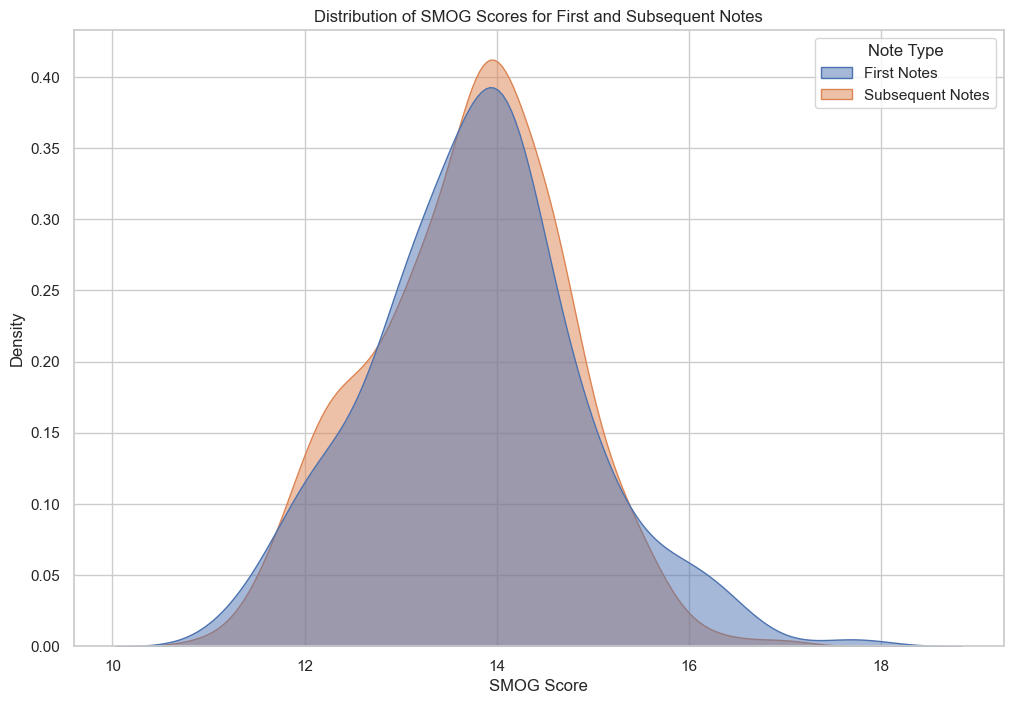

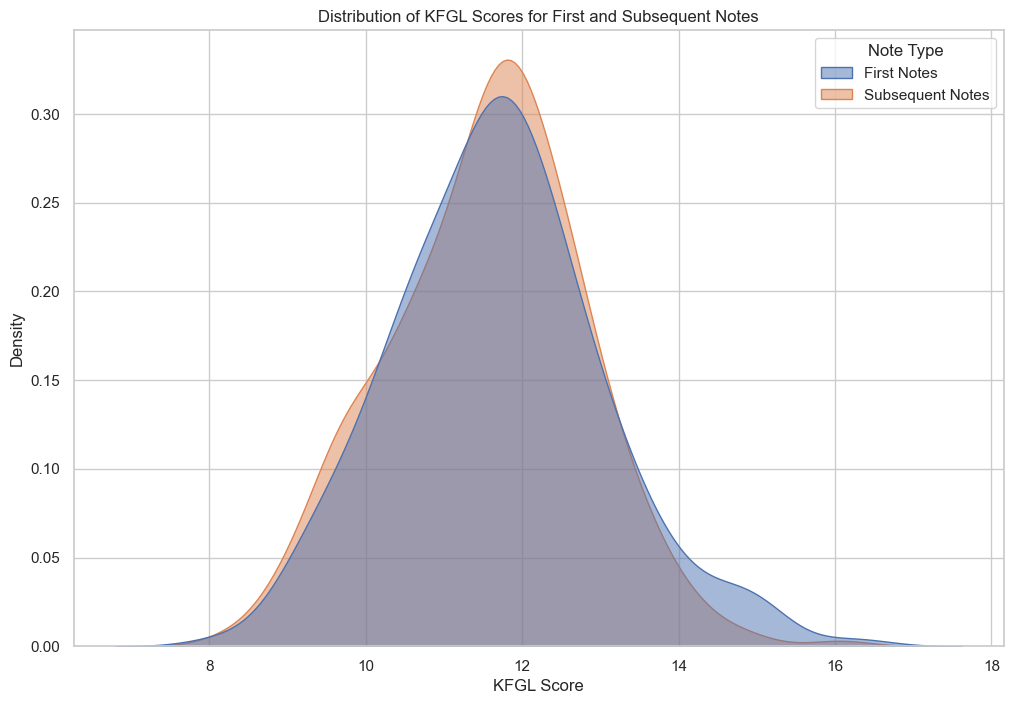

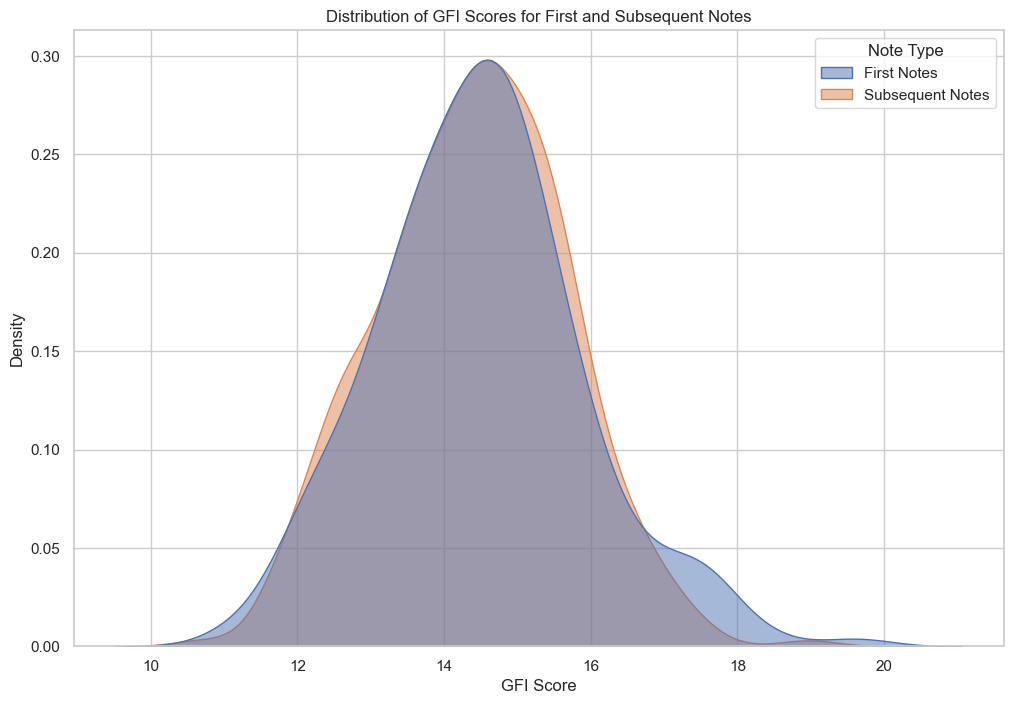

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the score columns to compare
score_columns = ["SMOG", "KFGL", "GFI"]

# Add a column to differentiate first and subsequent notes
first_notes_df["Note Type"] = "First Notes"
subsequent_notes_df["Note Type"] = "Subsequent Notes"

# Combine the two dataframes for plotting
combined_df = pd.concat([first_notes_df, subsequent_notes_df], ignore_index=True)

# Plot the distributions for each score
for score in score_columns:
    plt.figure(figsize=(12, 8))
    sns.kdeplot(data=combined_df, x=score, hue="Note Type", fill=True, common_norm=False, alpha=0.5)
    plt.title(f"Distribution of {score} Scores for First and Subsequent Notes")
    plt.xlabel(f"{score} Score")
    plt.ylabel("Density")
    plt.show()


In [36]:
file_path = "../data/all_notes.csv"
all_notes_df = pd.read_csv(file_path)

all_notes_df.dropna(subset=["text"], inplace=True)
all_notes_df.shape

(1828, 17)

In [37]:
# Calculate SMOG, KFGL, and GFI for each note in the 'text' column
all_notes_df["SMOG"] = all_notes_df["text"].apply(textstat.smog_index)
all_notes_df["KFGL"] = all_notes_df["text"].apply(textstat.flesch_kincaid_grade)
all_notes_df["GFI"] = all_notes_df["text"].apply(textstat.gunning_fog)

In [11]:
all_notes_df.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version,diagnosis_category,gender,anchor_age,anchor_year,anchor_year_group,dod,note_id,note_type,note_seq,charttime,storetime,text,SMOG,KFGL,GFI
13,10011259,29284526,1,F339,10,Major Depression,M,37,2161,2014 - 2016,NaN,10011259-DS-8,DS,8.0,2161-07-08 00:00:00,2161-07-12 20:52:00,\nName: ___ Unit No: __...,14.113878,11.889866,15.022617
14,10011365,26722872,1,F322,10,Major Depression,F,73,2157,2008 - 2010,2166-02-20,10011365-DS-16,DS,16.0,2166-01-28 00:00:00,2166-01-28 11:57:00,\nName: ___ Unit No: ___\...,12.208186,9.816931,12.753696
18,10015132,24394632,1,F319,10,Bipolar Disorder,M,19,2137,2014 - 2016,NaN,10015132-DS-13,DS,13.0,2140-12-24 00:00:00,2140-12-24 11:24:00,\nName: ___ Unit No: ___\...,13.711578,11.633120,14.395036
28,10026754,22691839,1,F315,10,Bipolar Disorder,F,55,2133,2014 - 2016,NaN,10026754-DS-3,DS,3.0,2136-08-18 00:00:00,2136-08-18 13:27:00,\nName: ___ Unit No: ___\...,14.932843,12.799607,15.879191
34,10029649,25577737,1,F329,10,Major Depression,F,34,2111,2017 - 2019,NaN,10029649-DS-21,DS,21.0,2111-03-17 00:00:00,2111-03-17 09:21:00,\nName: ___ Unit No: ...,15.428653,13.703248,16.664989


       count       mean       std        min        25%        50%        75%  \
SMOG  1828.0  13.961396  1.045468  10.050924  13.325660  14.002774  14.604918   
KFGL  1828.0  11.886018  1.311745   7.690028  11.074488  11.916674  12.695102   
GFI   1828.0  14.696923  1.369269   9.673941  13.818972  14.716789  15.504509   

            max   Typical Education Level  
SMOG  18.648731     College (Grade 13-16)  
KFGL  18.775319  High School (Grade 9-12)  
GFI   21.854397     College (Grade 13-16)  


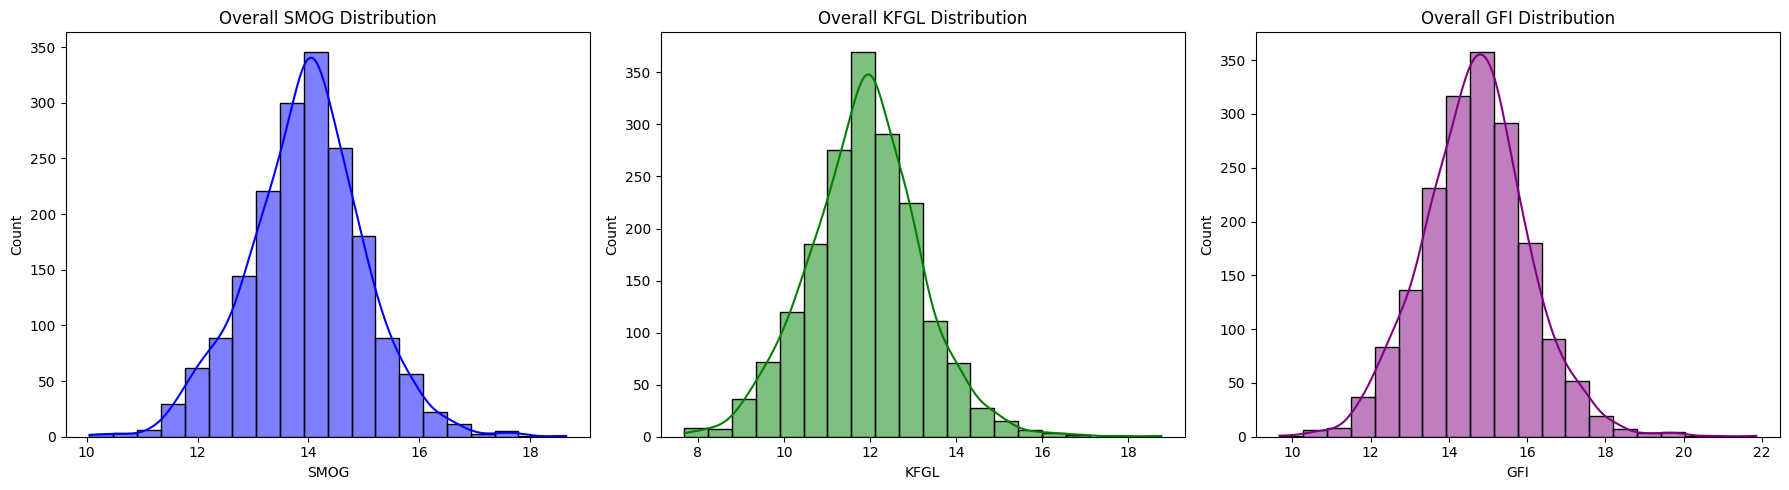

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate basic statistics
readability_stats = all_notes_df[["SMOG", "KFGL", "GFI"]].describe().transpose()

# Add interpretation of grade levels
readability_stats["Typical Education Level"] = readability_stats["mean"].apply(
    lambda x: 
    "Elementary School (Grade 1-5)" if x < 6 else
    "Middle School (Grade 6-8)" if x < 9 else
    "High School (Grade 9-12)" if x < 13 else
    "College (Grade 13-16)" if x < 17 else
    "Graduate School (Grade 17+)"
)

print(readability_stats)

# Overall distribution of readability scores
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(all_notes_df["SMOG"], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Overall SMOG Distribution")
sns.histplot(all_notes_df["KFGL"], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title("Overall KFGL Distribution")
sns.histplot(all_notes_df["GFI"], bins=20, kde=True, ax=axes[2], color='purple')
axes[2].set_title("Overall GFI Distribution")
plt.tight_layout()
plt.show()

In [16]:
import re

# Define ICD-10 code categories
categories = {
    "Major Depression": ["F32", "F33"],
    "Bipolar Disorder": ["F25.0", "F30", "F31"],
    "Persistent Mood Disorder": ["F34"],
    "Eating Disorder": ["F50"],
    "Schizophrenia": ["F20"]
}

# Map notes to disease categories based on their ICD code
def map_category(icd_code, categories):
    for category, codes in categories.items():
        if any(re.match(f"^{code}", icd_code) for code in codes):
            return category
    return "Other"

all_notes_df["category"] = all_notes_df["icd_code"].apply(lambda x: map_category(x, categories))



In [ ]:
# Create a table for the number of cases for each disease category
# Define the order of disease categories for consistent visualization
disease_order = ["Major Depression", "Bipolar Disorder", "Persistent Mood Disorder", "Eating Disorder", "Schizophrenia"]

case_counts_df = all_notes_df["category"].value_counts().reindex(disease_order).reset_index()
case_counts_df.columns = ["Disease Category", "Count"]

case_counts_df


,Disease Category,Count
0,Major Depression,900
1,Bipolar Disorder,424
2,Persistent Mood Disorder,5
3,Eating Disorder,107
4,Schizophrenia,231


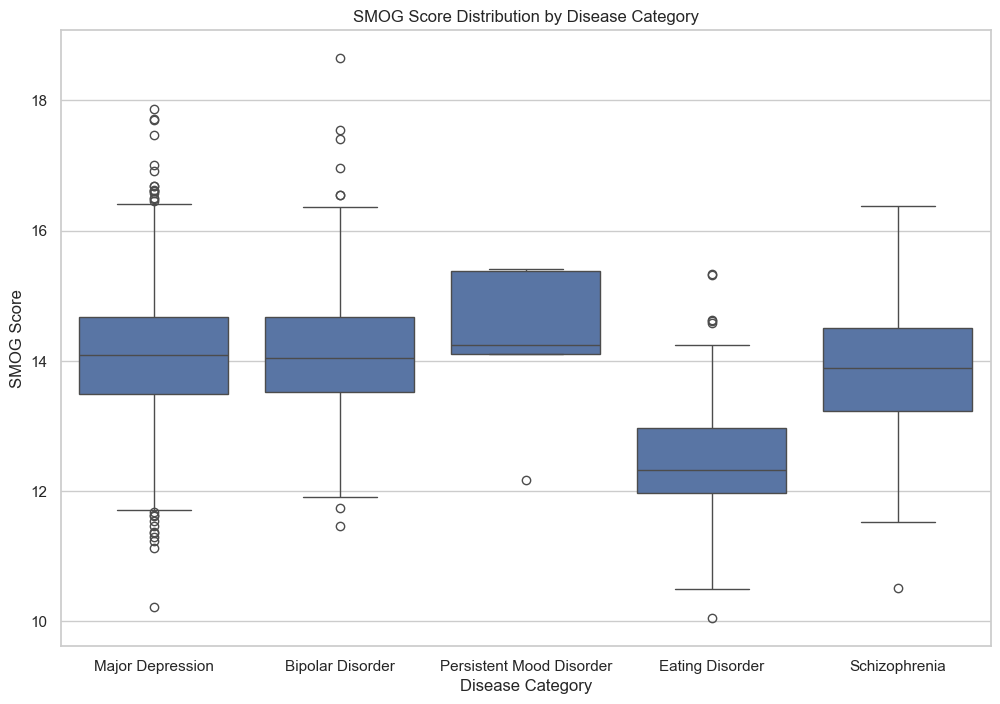

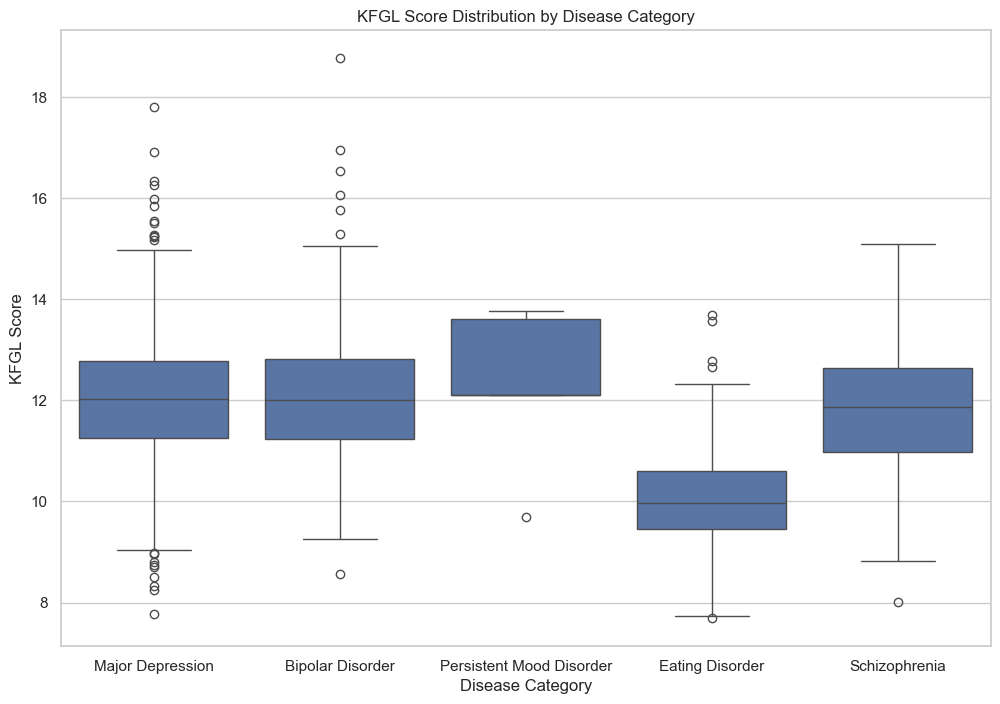

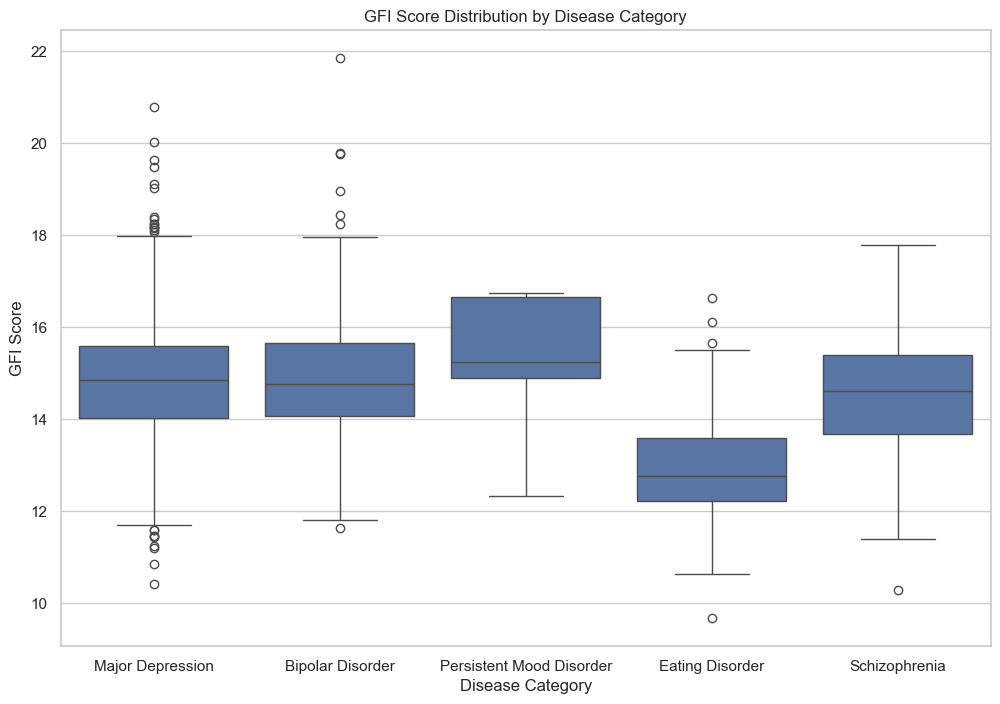

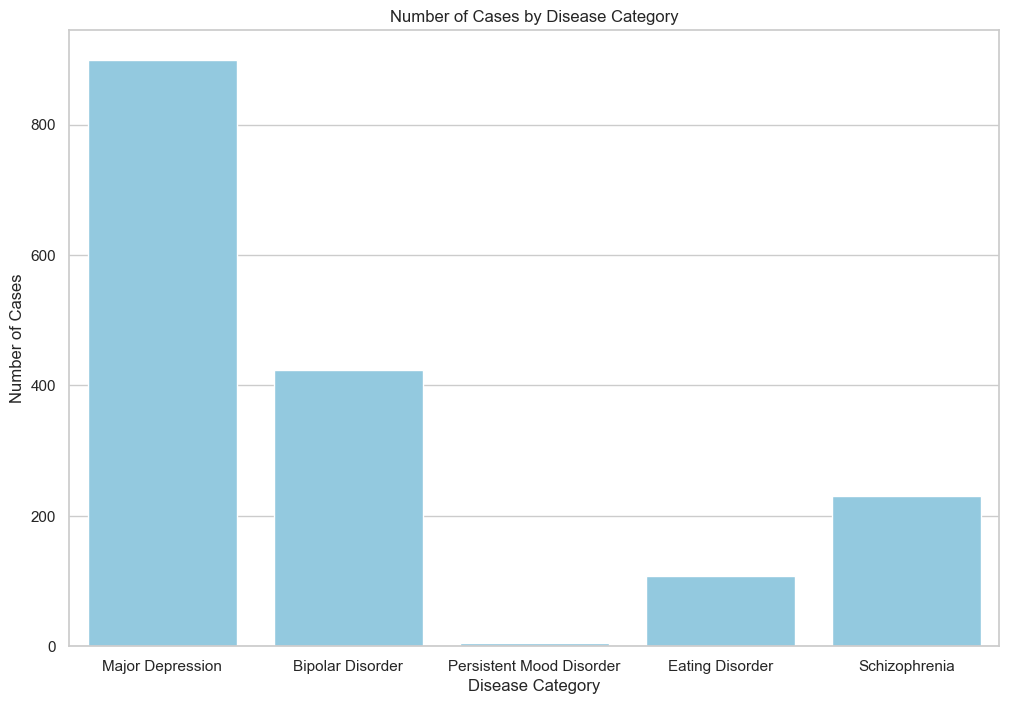

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the plot style for readability
sns.set(style="whitegrid")

# Define the order of disease categories for consistent visualization
disease_order = ["Major Depression", "Bipolar Disorder", "Persistent Mood Disorder", "Eating Disorder", "Schizophrenia"]

# Count the number of cases for each disease category
case_counts = all_notes_df["category"].value_counts().reindex(disease_order).reset_index()
case_counts.columns = ["Disease Category", "Count"]

# Plot SMOG Score Distribution
plt.figure(figsize=(12, 8))
sns.boxplot(data=all_notes_df, x="category", y="SMOG", order=disease_order)
plt.title("SMOG Score Distribution by Disease Category")
plt.xlabel("Disease Category")
plt.ylabel("SMOG Score")
plt.show()

# Plot KFGL Score Distribution
plt.figure(figsize=(12, 8))
sns.boxplot(data=all_notes_df, x="category", y="KFGL", order=disease_order)
plt.title("KFGL Score Distribution by Disease Category")
plt.xlabel("Disease Category")
plt.ylabel("KFGL Score")
plt.show()

# Plot GFI Score Distribution
plt.figure(figsize=(12, 8))
sns.boxplot(data=all_notes_df, x="category", y="GFI", order=disease_order)
plt.title("GFI Score Distribution by Disease Category")
plt.xlabel("Disease Category")
plt.ylabel("GFI Score")
plt.show()

# Plot Number of Cases
plt.figure(figsize=(12, 8))
sns.barplot(data=case_counts, x="Disease Category", y="Count", color="skyblue")
plt.title("Number of Cases by Disease Category")
plt.xlabel("Disease Category")
plt.ylabel("Number of Cases")
plt.show()


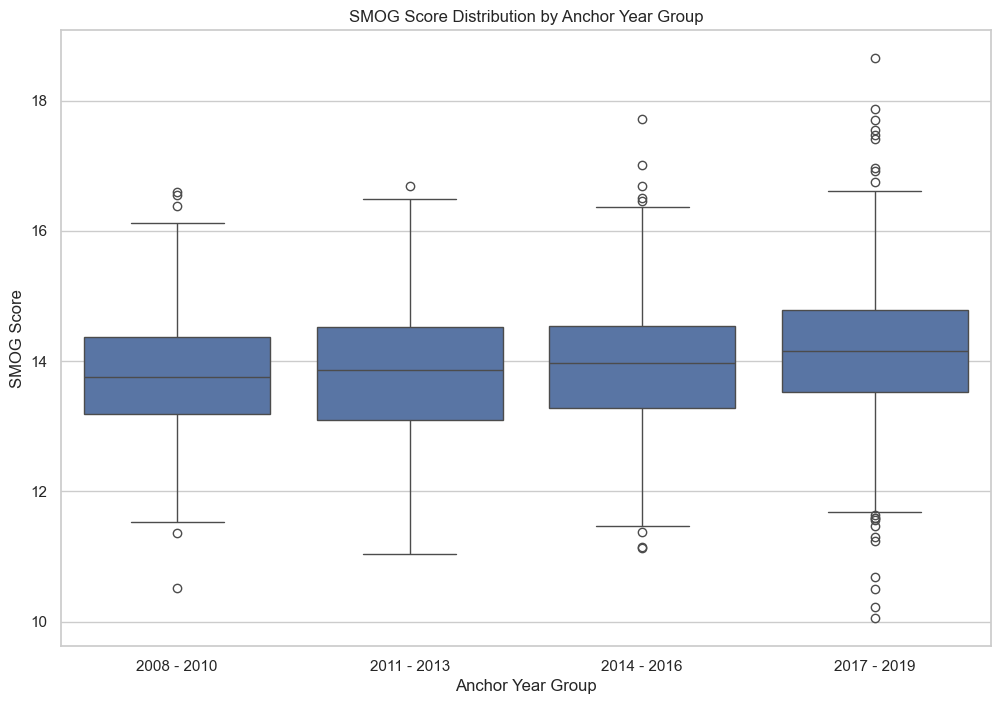

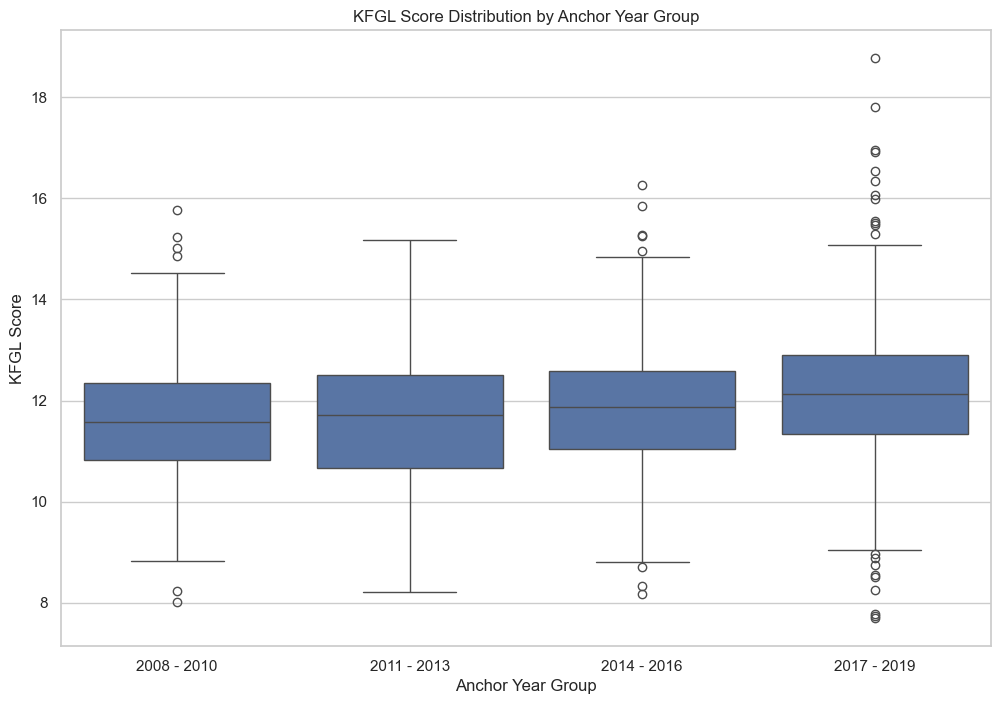

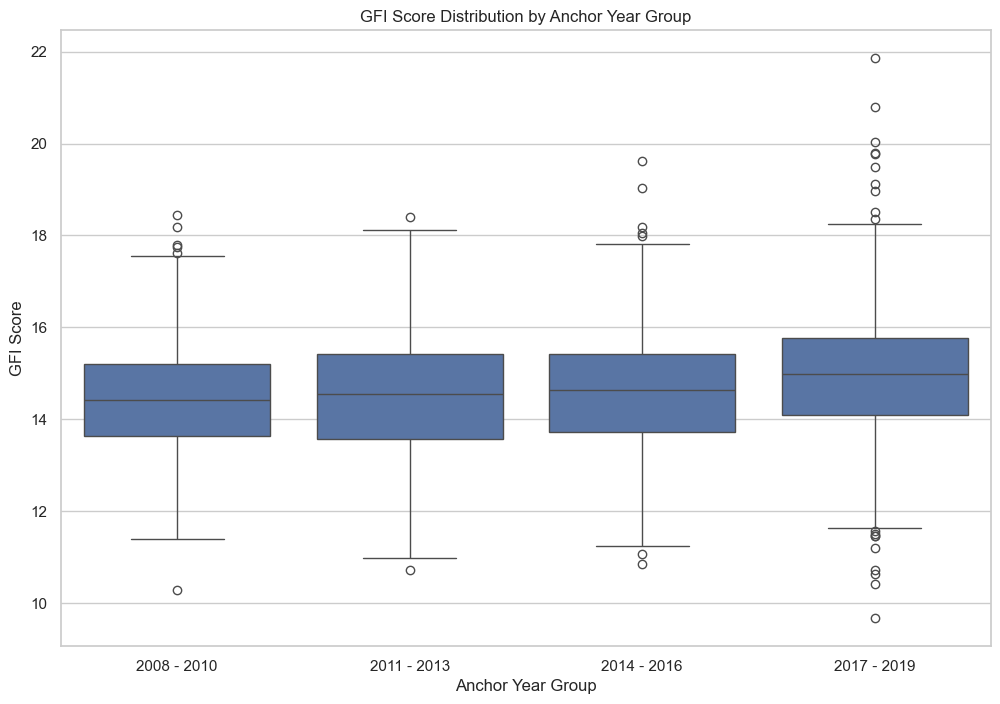

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the plot style for readability
sns.set(style="whitegrid")

# Define the score columns to compare
score_columns = ["SMOG", "KFGL", "GFI"]

# Manually order the anchor_year_group categories
year_order = ["2008 - 2010", "2011 - 2013", "2014 - 2016", "2017 - 2019"]

# Plot the readability scores across anchor_year_group
for score in score_columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=all_notes_df, x="anchor_year_group", y=score, order=year_order)
    plt.title(f"{score} Score Distribution by Anchor Year Group")
    plt.xlabel("Anchor Year Group")
    plt.ylabel(f"{score} Score")
    plt.show()


In [25]:
all_notes_df["anchor_year_group"].value_counts()

2017 - 2019    695
2014 - 2016    584
2008 - 2010    325
2011 - 2013    224
Name: anchor_year_group, dtype: int64

In [28]:
import scipy.stats as stats

# Manually order the anchor_year_group categories
year_order = ["2008 - 2010", "2011 - 2013", "2014 - 2016", "2017 - 2019"]

# Define the score columns to compare
score_columns = ["SMOG", "KFGL", "GFI"]

# Perform ANOVA for each score column
anova_results = []
for score in score_columns:
    # Extract data for each group
    groups = [all_notes_df[all_notes_df["anchor_year_group"] == year][score].dropna() for year in year_order]
    
    # Perform one-way ANOVA
    f_stat, p_value = stats.f_oneway(*groups)
    anova_results.append({"Score": score, "F-statistic": f_stat, "p-value": p_value})

# Convert results to DataFrame and display
anova_df = pd.DataFrame(anova_results)
anova_df

,Score,F-statistic,p-value
0,SMOG,13.357417,1.264438e-08
1,KFGL,15.190031,9.151578e-10
2,GFI,14.118942,4.246181e-09


In [31]:
import scipy.stats as stats
import pandas as pd

# Define the year groups to compare
year_groups = {
    "2014-2016 vs Previous": ["2008 - 2010", "2011 - 2013", "2014 - 2016"],
    "2017-2019 vs 2014-2016": ["2014 - 2016", "2017 - 2019"]
}

# Define the score columns to compare
score_columns = ["SMOG", "KFGL", "GFI"]

# Perform pairwise t-tests
ttest_results = []
for comparison, years in year_groups.items():
    for score in score_columns:
        # Get the data for the two groups being compared
        group1 = all_notes_df[all_notes_df["anchor_year_group"].isin(years[:-1])][score].dropna()
        group2 = all_notes_df[all_notes_df["anchor_year_group"] == years[-1]][score].dropna()
        
        # Perform the t-test
        t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
        ttest_results.append({
            "Comparison": comparison,
            "Score": score,
            "t-statistic": t_stat,
            "p-value": p_value
        })

# Convert to DataFrame and display
ttest_df = pd.DataFrame(ttest_results)
ttest_df


,Comparison,Score,t-statistic,p-value
0,2014-2016 vs Previous,SMOG,-2.262097,0.023882
1,2014-2016 vs Previous,KFGL,-2.376407,0.017649
2,2014-2016 vs Previous,GFI,-1.524377,0.127695
3,2017-2019 vs 2014-2016,SMOG,-3.893337,0.000104
4,2017-2019 vs 2014-2016,KFGL,-4.208031,0.000028
5,2017-2019 vs 2014-2016,GFI,-4.611657,0.000004
